PRIMEIRA APLICAÇÃO DE APRENDIZADO DE MÁQUINA

In [143]:
# Importando bibliotecas
import pandas as pd
import numpy as np

from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [144]:
# Ler dados do DataSet
csv_dir_treinamento = "/content/sample_data/smoke_detection_iot.csv"
data = pd.read_csv(csv_dir_treinamento, delimiter=",")

In [145]:
data.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [146]:
# Pegar informações para ver se são dados númericos ou precisa ser tratado e se tem nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [147]:
data.nunique()

Unnamed: 0        62630
UTC               62630
Temperature[C]    21672
Humidity[%]        3890
TVOC[ppb]          1966
eCO2[ppm]          1713
Raw H2             1830
Raw Ethanol        2659
Pressure[hPa]      2213
PM1.0              1337
PM2.5              1351
NC0.5              3093
NC1.0              4113
NC2.5              1161
CNT               24994
Fire Alarm            2
dtype: int64

In [148]:
# Remover coluna de Indice e coluanas que não ajudam na classificação
data.drop(['Unnamed: 0', 'CNT', 'UTC'], axis=1, inplace=True)

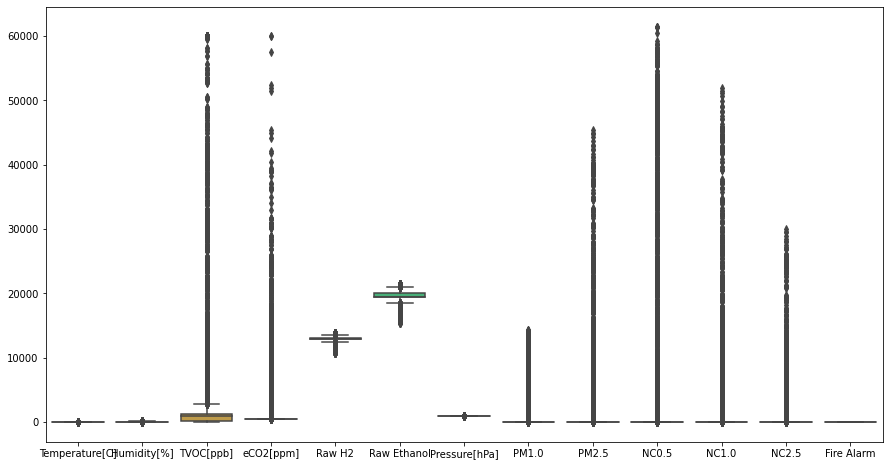

In [149]:
plt.figure(figsize=[15,8])
sns.boxplot(data=data)

In [150]:
for col in data.columns:
  print("Old Shape: ", data.shape)
  q1 = data[col].quantile(0.25)
  q3 = data[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound  = q1 -(1.5 * iqr) 
  upper_bound = q3 +(1.5 * iqr)
  data = data.drop(data[data[col] < lower_bound].index)
  data = data.drop(data[data[col] > upper_bound].index)
  print("New Shape: ", data.shape)

Old Shape:  (62630, 13)
New Shape:  (58722, 13)
Old Shape:  (58722, 13)
New Shape:  (55188, 13)
Old Shape:  (55188, 13)
New Shape:  (54938, 13)
Old Shape:  (54938, 13)
New Shape:  (45070, 13)
Old Shape:  (45070, 13)
New Shape:  (44968, 13)
Old Shape:  (44968, 13)
New Shape:  (44540, 13)
Old Shape:  (44540, 13)
New Shape:  (43645, 13)
Old Shape:  (43645, 13)
New Shape:  (43641, 13)
Old Shape:  (43641, 13)
New Shape:  (43641, 13)
Old Shape:  (43641, 13)
New Shape:  (43641, 13)
Old Shape:  (43641, 13)
New Shape:  (43641, 13)
Old Shape:  (43641, 13)
New Shape:  (43463, 13)
Old Shape:  (43463, 13)
New Shape:  (43463, 13)


In [ ]:
# Printar cada coluna em um gráfico diferente (BOXPLOT)
for col in data.columns:
    sns.boxplot(x=data[col])
    plt.show()

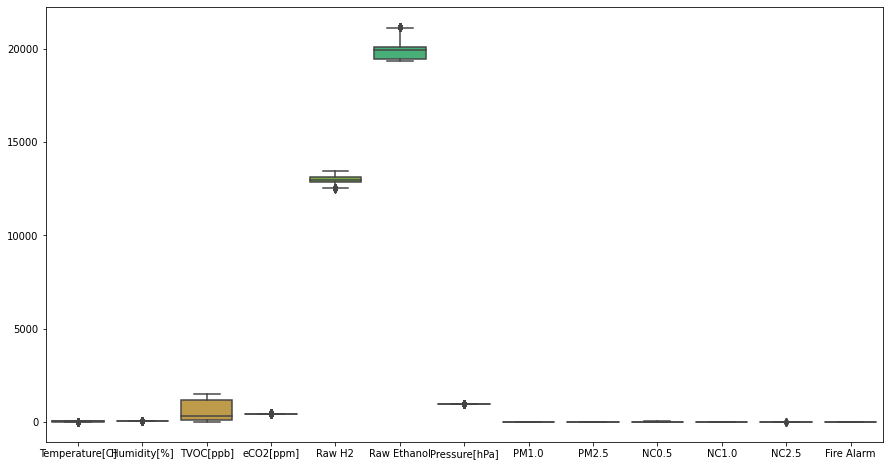

In [152]:
# Printar todas colunas em uma imagem (BOXPLOT)
plt.figure(figsize=[15,8])
sns.boxplot(data=data)

In [153]:
# Pegar os datasets separados
y = data['Fire Alarm']
X = data.drop(['Fire Alarm'], axis=1)

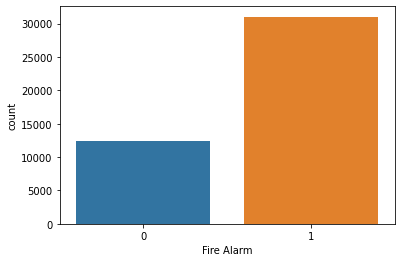

In [154]:
# Ver se os dados estão balanceados
sns.countplot(y)

In [155]:
# Separar dados de treinamento e de testes
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [156]:
# Balanceamento dos dados
rus = RandomUnderSampler(random_state=42)
X, y = rus.fit_resample(X, y)

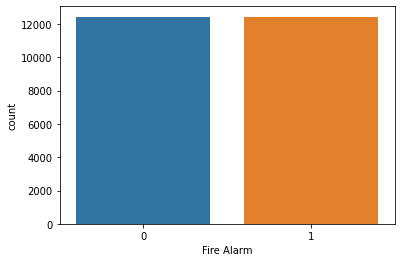

In [157]:
# Ver se os dados foram balanceados
sns.countplot(y)

<Figure size 864x576 with 0 Axes>

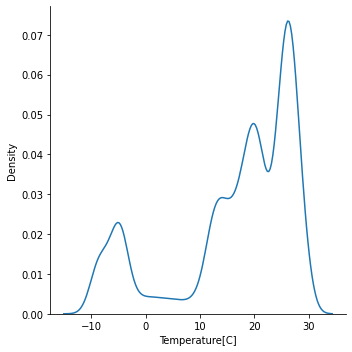

<Figure size 864x576 with 0 Axes>

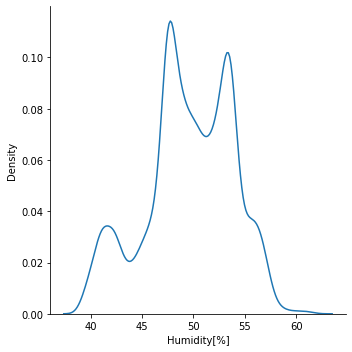

<Figure size 864x576 with 0 Axes>

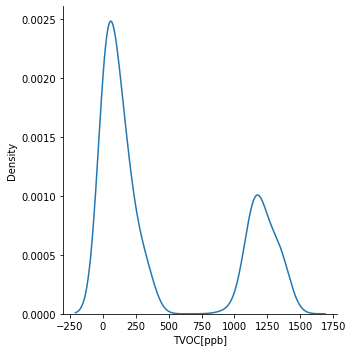

<Figure size 864x576 with 0 Axes>

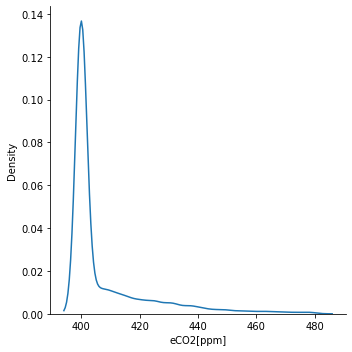

<Figure size 864x576 with 0 Axes>

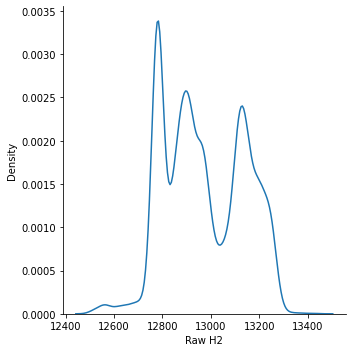

<Figure size 864x576 with 0 Axes>

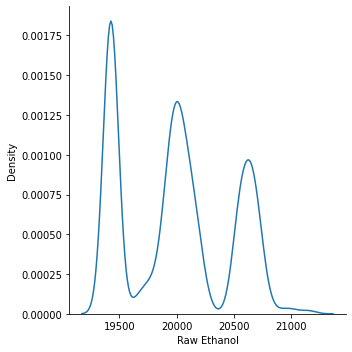

<Figure size 864x576 with 0 Axes>

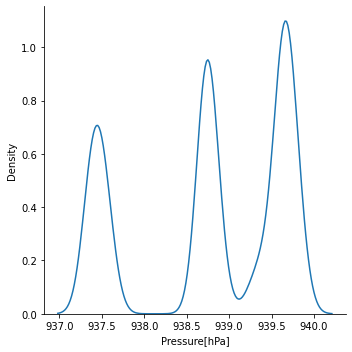

<Figure size 864x576 with 0 Axes>

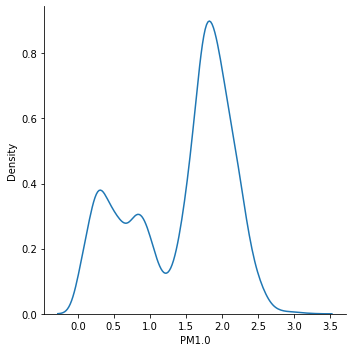

<Figure size 864x576 with 0 Axes>

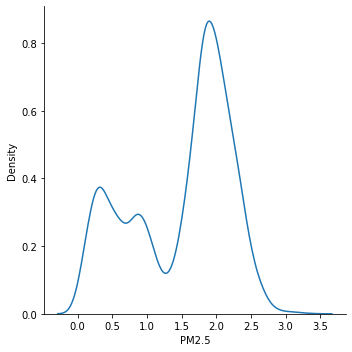

<Figure size 864x576 with 0 Axes>

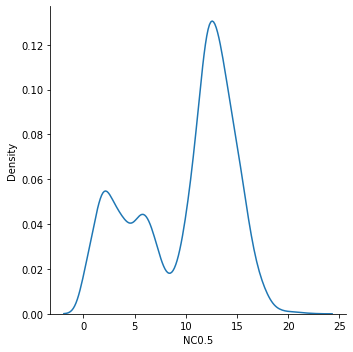

<Figure size 864x576 with 0 Axes>

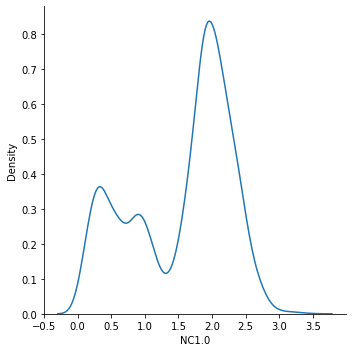

<Figure size 864x576 with 0 Axes>

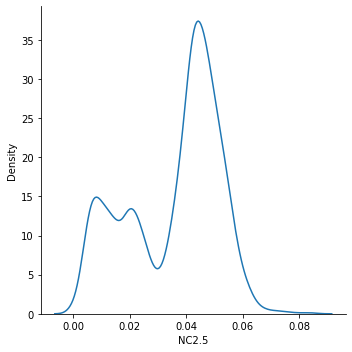

In [158]:
# Visualização dos dados em dimensão
for col in X.columns:
  plt.figure(figsize=(12,8))
  sns.displot(X, x=col, kind="kde")

Aplicação do PCA

O PCA é um algoritimo de redução de dimensionalidade. Se você tem um dataset com uma grande quantidade de características, algumas delas podem não ser relevantes. O PCA é uma ferramenta que usa transformações lineares para analisar os dados e identificar as componentes principais.

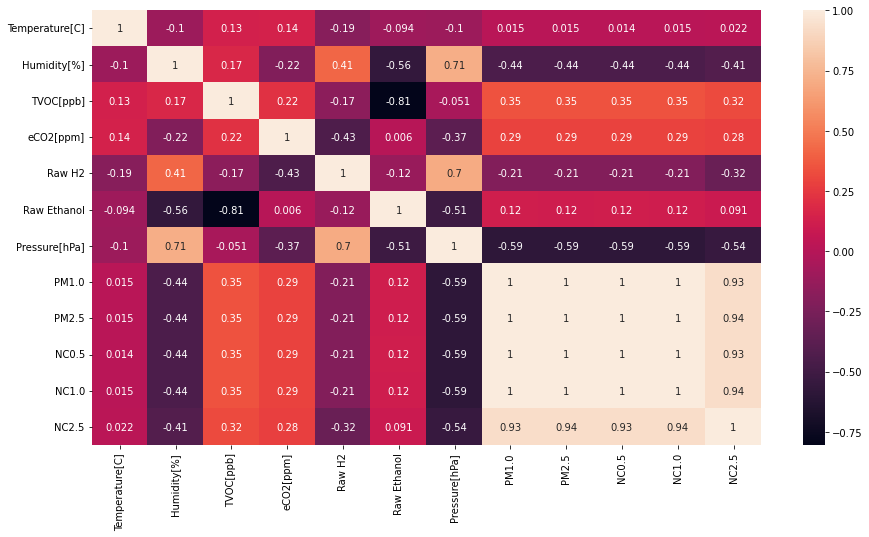

In [159]:
# gráfico PCA do dataset atualizado
plt.figure(figsize=[15, 8])
sns.heatmap(X.corr(), annot = True)